# Evoked potentials/ERPs with MNE

<br/>
Arguably one of the easiest and most common ways to analyse EEG data is to look at evoked/event-related potentials. ERPs are observed for most sensory or cognitive processes. They further may be significantly altered for people suffering from psychological disorders <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3016705/" title="ncbi: Event-related potential: An overview">(Sur & Sinha1, 2009)</a>. For an overview of different ERPs see e.g. <a href="https://www.neuroelectrics.com/blog/2014/12/18/14-event-related-potentials-erp-components-and-modalities/" title="https://www.neuroelectrics.com/blog/2014/12/18/14-event-related-potentials-erp-components-and-modalities/">Event Related Potentials (ERP) – Components and Modalities</a>. You can also follow the <a href="https://mne.tools/stable/auto_tutorials/evoked/30_eeg_erp.html" title="https://mne.tools/stable/auto_tutorials/evoked/30_eeg_erp.html">MNE tutorial: EEG processing and Event Related Potentials (ERPs)</a> and the <a href="https://mne.tools/stable/auto_tutorials/evoked/10_evoked_overview.html" title="https://mne.tools/stable/auto_tutorials/evoked/10_evoked_overview.html">MNE tutorial on the Evoked data structure</a>, which we'll use to store and manipulate our averaged EEG data.




**As the sample dataset provided by MNE involves the presentation of visual and auditory stimuli, we should be able to observe evoked potentials related to early sensory processing when we look at the average activity in our previously build epochs**. These sensory processess should further be constrained to specific regions in the brain by their modality, therefore we should be able to distinguish between e.g. visual and auditory information processing based on defined regions of interest.

<br/>

**To calculate Evoked potentials/ERPs we first have to**
1. clean and subsequently separate the EEG data into epochs
2. calculate the signal average over epochs based on their condition for each channel
3. define our regions of interest (roi) (i.e. retain only data from electrodes of interest)

Although steps 2. and 3. can be used interchangably, as it's more efficient to select only a subset of your channels based on the defined regions of interest to average over. To get a better overview of the overall channel activity we'll look at the averaged acitivity for all channels in this chapter.

Afterwards we could use common statistical tools (such as ANOVAs or t-tests) to compare evoked potentials/ERPs based on condition, peak amplitude between conditions etc.

## Setup

As in the previous chapter we'll first import our necessary libraries and the <a href="https://mne.tools/stable/overview/datasets_index.html" title="https://mne.tools/stable/overview/datasets_index.html">sample dataset</a> provided by MNE. 

In [1]:
# import necessary libraries/functions
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

# this allows for interactive pop-up plots
#%matplotlib qt

# allows for rendering in output-cell
%matplotlib inline

# import mne library
import mne
from mne_bids import BIDSPath, write_raw_bids, print_dir_tree, make_report, read_raw_bids

## 1. Preprocessing and epoching

<br/>

As we've already preprocessed the sample-dataset and separated the continous raw data into epochs based on stimuli modality in the previous step we'll simply import the prepared Epochs object using the <a href="https://mne.tools/stable/generated/mne.read_epochs.html" title="https://mne.tools/stable/generated/mne.read_epochs.html">mne.read_epochs()</a> function.


In [2]:
homedir = os.path.expanduser("~")  # find home diretory
input_path = (homedir + str(os.sep) + 'msc_05_example_bids_dataset' + 
               str(os.sep) + 'sub-test' + str(os.sep) + 'ses-001' + str(os.sep) + 'meg')

In [3]:
epochs = mne.read_epochs(input_path + str(os.sep) + "sub-test_ses-001_sample_audiovis_eeg_data_epo.fif",
                             preload=True)  # load data into memory

Reading /home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg/sub-test_ses-001_sample_audiovis_eeg_data_epo.fif ...
    Found the data of interest:
        t =    -299.69 ...     699.28 ms
        0 CTF compensation matrices available
0 bad epochs dropped
Not setting metadata
264 matching events found
No baseline correction applied
0 projection items activated


<br/>
Looking at the output of our .info object reveals that we've previosuly applied a filter and kept only the EEG channels to create our epochs

In [4]:
epochs.info

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 59 EEG
 custom_ref_applied: True
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 40.0 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 59
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>

<br/>

The **epochs.events** object contains the respective **starting sample of events and their numerical identifier**

In [5]:
epochs.events

array([[ 27977,      0,      2],
       [ 28345,      0,      3],
       [ 28771,      0,      1],
       [ 29219,      0,      4],
       [ 29652,      0,      2],
       [ 30025,      0,      3],
       [ 30450,      0,      1],
       [ 30839,      0,      4],
       [ 31240,      0,      2],
       [ 31665,      0,      3],
       [ 32101,      0,      1],
       [ 32519,      0,      4],
       [ 32935,      0,      2],
       [ 33325,      0,      3],
       [ 33712,      0,      1],
       [ 34089,      0,      5],
       [ 34532,      0,      2],
       [ 34649,      0,     32],
       [ 34956,      0,      3],
       [ 35428,      0,      1],
       [ 35850,      0,      4],
       [ 36211,      0,      2],
       [ 36576,      0,      3],
       [ 37007,      0,      1],
       [ 37460,      0,      4],
       [ 37910,      0,      2],
       [ 38326,      0,      3],
       [ 38711,      0,      1],
       [ 39130,      0,      4],
       [ 39563,      0,      2],
       [ 3

<br/>

So we can plot our epochs with the corresponding events marked again using the **.plot()** function

You seem to have overlapping epochs. Some event lines may be duplicated in the plot.
Using matplotlib as 2D backend.
Opening epochs-browser...


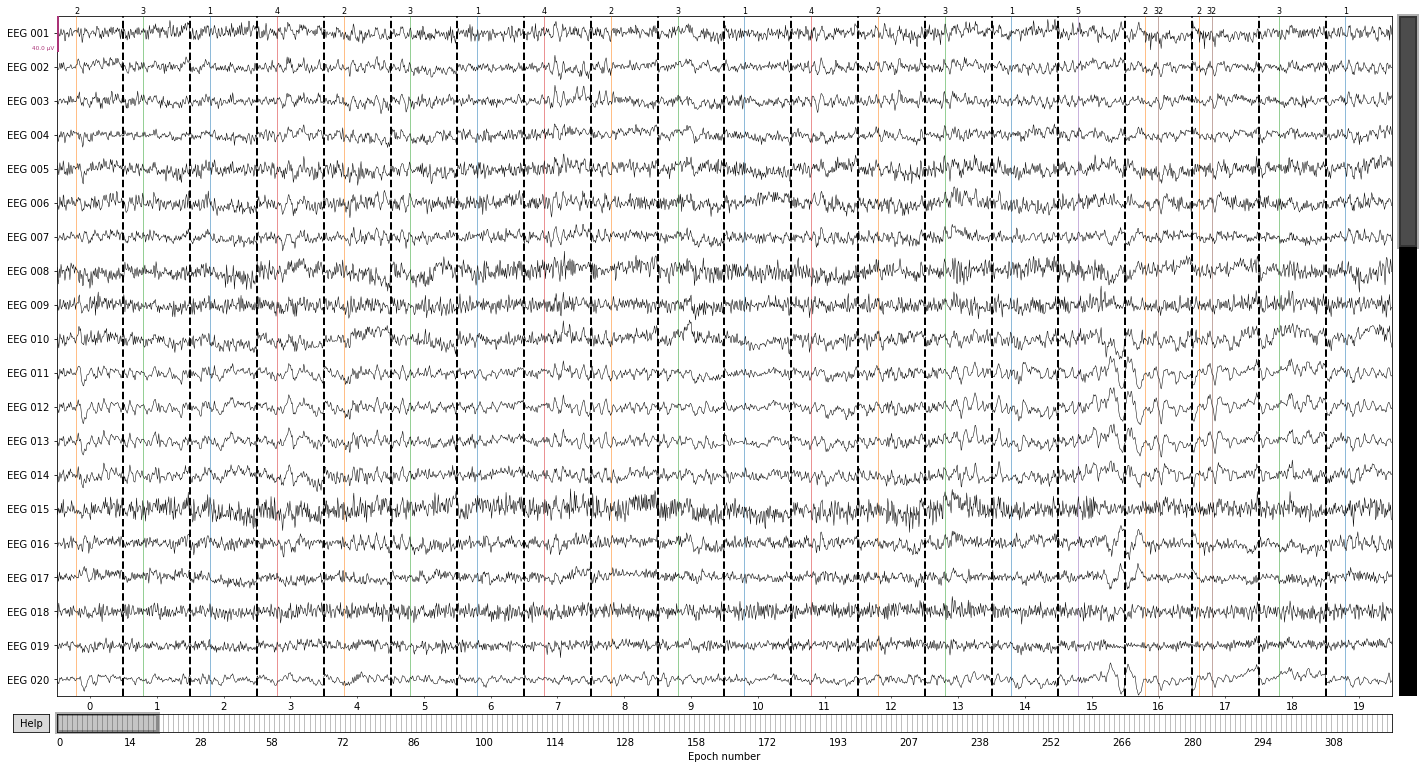

In [6]:
epochs.plot(events=epochs.events);

<br/>

The **events_id** object contains our previously assigned labels

In [7]:
epochs.event_id

{'auditory/left': 1,
 'auditory/right': 2,
 'visual/left': 3,
 'visual/right': 4,
 'face': 5,
 'buttonpress': 32}

<br/>
And with this we can visualize the timing of separate events using the <a href="https://mne.tools/stable/generated/mne.viz.plot_events.html" title="https://mne.tools/stable/generated/mne.viz.plot_events.html">plot_events()</a>
function

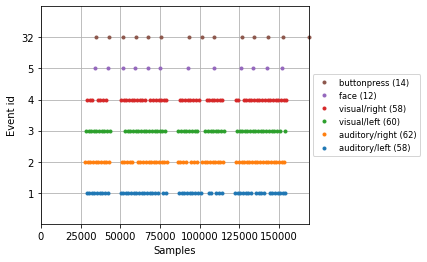

In [8]:
mne.viz.plot_events(events=epochs.events, event_id=epochs.event_id);

<br/>

## 2. Calculate the signal average


To construct our evoked objects we'll use the epochs<a href="https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.average" title="https://mne.tools/stable/generated/mne.Epochs.html#mne.Epochs.average">.average()</a> function. We can further **specify which channels we want to include (can also be a single channel or a subset of channels), how to calculate the average (aritmethic mean or median) and, using the by_event_type parameter, if we want to average over all events or if the function should return a list of evoked objects for each event_id**.

    

In [9]:
evokeds = epochs.average(picks=['eeg'],  # eeg channel only
                         method='mean',  # mean or median
                         by_event_type=True)  # return a list of evoked objects by event condition

evokeds

[<Evoked | 'auditory/left' (average, N=58), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>,
 <Evoked | 'auditory/right' (average, N=62), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>,
 <Evoked | 'visual/left' (average, N=60), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>,
 <Evoked | 'visual/right' (average, N=58), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>,
 <Evoked | 'face' (average, N=12), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>,
 <Evoked | 'buttonpress' (average, N=14), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>]

<br/>
If we set the parameter by_event_type=True we can access the returned evoked objects by their list_index

In [10]:
evokeds[0].get_data()  # first evoked object - 'auditory/left'

array([[ 1.58588210e-07,  4.14449820e-08, -4.87084335e-08, ...,
         1.69157032e-06,  1.51644329e-06,  1.42365011e-06],
       [ 1.67931646e-07,  1.61905496e-07,  1.93823008e-07, ...,
         2.88958198e-06,  2.72369747e-06,  2.53020267e-06],
       [-2.90857603e-07, -1.67109110e-07, -3.81991318e-08, ...,
         2.33253775e-06,  2.26626562e-06,  2.20365272e-06],
       ...,
       [-3.87839719e-08,  4.56590159e-08,  1.28239707e-07, ...,
        -2.05681725e-06, -2.01721058e-06, -1.95900427e-06],
       [-8.57313651e-07, -7.74666076e-07, -6.87243417e-07, ...,
        -1.07434462e-06, -1.02948976e-06, -9.67314412e-07],
       [ 1.26939683e-07,  1.38093103e-07,  1.53148588e-07, ...,
        -4.62783340e-07, -4.59852043e-07, -4.39987288e-07]])

<br/>
and we can plot the average activity per channel for the specific evoked object via the <a href="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot" title="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot">evoked.plot()</a> function, which given no further arguments returns a **butterfly plot showing activity averaged over all epochs for the given event_id separately for each channel**. Setting the parameter **spatial_colors=True** assigns a separate color to each channel and adds a map of color-coded channel locations to the plot, so we can identify which channel corresponds to which average. 

The **.plot()** function here is fairly limited in terms of customization, but gives us  a good overview of our data. **If we'd change the plotting function at the import libarires step above from "%matplotlib inline" to "%matplotlib qt", this would further return an interactive pop-up plot, with additional customization options.**

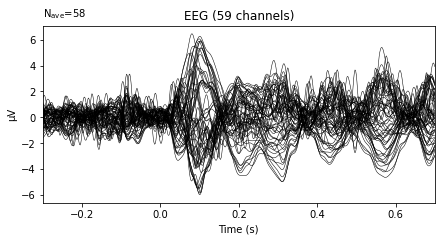

In [11]:
evokeds[0].plot();

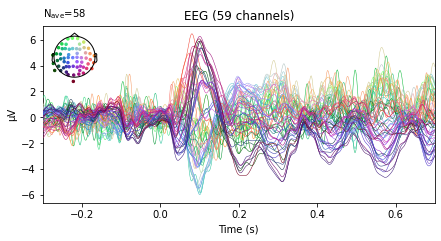

In [12]:
evokeds[0].plot(spatial_colors=True);

<br/>
A more explicit way to create our evoked objects is to first select the epoch via the event_id label

In [13]:
epochs['auditory/right'].average()

<Evoked | 'auditory/right' (average, N=62), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>

<br/>
and we'll assign the evoked objects to a new variable

In [14]:
r_aud_ev = epochs['auditory/right'].average()
l_aud_ev = epochs['auditory/left'].average()
l_vis_ev = epochs['visual/left'].average()
r_vis_ev = epochs['visual/right'].average()
face__ev = epochs['face'].average()
motor_ev = epochs['buttonpress'].average()

In [15]:
r_aud_ev

<Evoked | 'auditory/right' (average, N=62), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 59 ch, ~3.2 MB>

<br/>
This way we can also select evoked objects based on subsets of events, such as evoked objects based on the presentation of just auditory or visual stimuli

In [16]:
aud_ev = epochs['auditory'].average()
vis_ev = epochs['visual'].average()

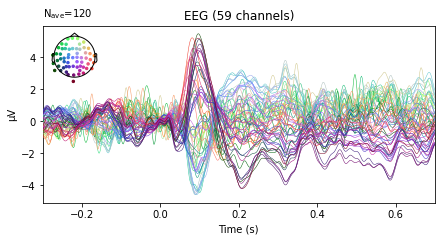

In [17]:
aud_ev.plot(spatial_colors=True);

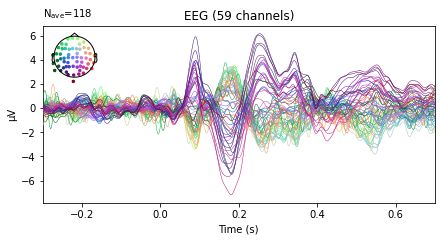

In [18]:
vis_ev.plot(spatial_colors=True);

<br/>
or evoked objects for stimuli presented on the right vs stimuli presented on the left side

In [19]:
left_ev = epochs['left'].average()
right_ev = epochs['right'].average()

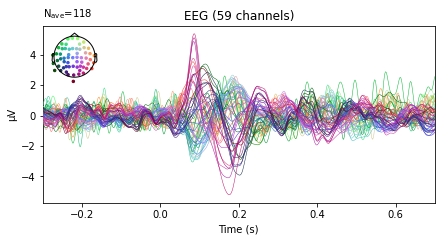

In [20]:
left_ev.plot(spatial_colors=True);

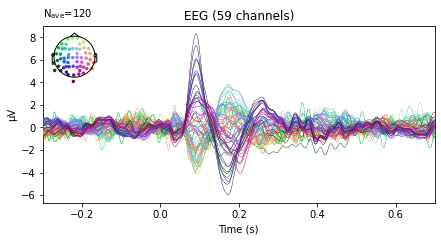

In [21]:
right_ev.plot(spatial_colors=True);

<br/>

MNE provides additional functions to **visualize evoked objects such as the <a href="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap" title="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap">plot_topomap()</a> function, which allows the plotting of topographic maps for specific time points of evoked data**. 

For illustrative purposes we'll specify some time-points we're interested in and the time-window that the activity should be averaged over for the topomap per timepoint (0.01 = 10ms window, centered around the time-points) and switch to a diverging colormap that is less of a problem for colorblind folks. If you want to go wild with your topomaps check out the ~ 30 parameters referenced in the <a href="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap" title="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_topomap">API</a>.

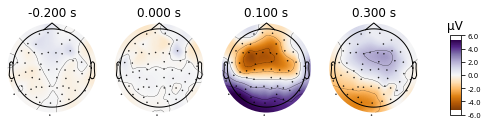

In [22]:
aud_ev.plot_topomap(times=[-0.2, 0, 0.1, 0.3],  # bit arbitrary; -200 should catch the baseline and should show no activity
                    cmap='PuOr',
                    #show_names=True,  # don't do it unless you upsize your plot 
                    average=0.01);

<br/>

Combining the above butterfly and topomap plots is the <a href="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_joint" title="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_joint">plot_joint()</a> function. With no further arguments provided it will select the 3 points of greatest variability for the topomap.

No projector specified for this dataset. Please consider the method self.add_proj.


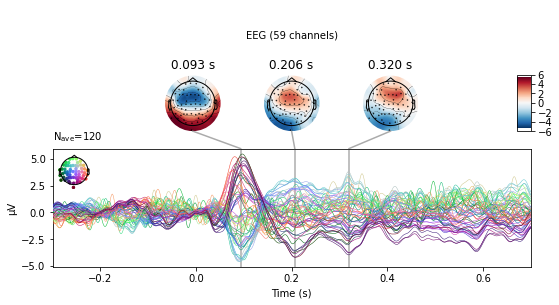

In [23]:
aud_ev.plot_joint();

<br/>

We can also **plot the evoked data as an image plot** using the <a href="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_image" title="https://mne.tools/stable/generated/mne.Evoked.html#mne.Evoked.plot_image">.plot_image()</a> function, which returns a heatmap that reflects the amplitude of the average signal for each channel specified in the picks parameter (which defaults to all, if not explicitly instructed otherwise) over the epoch. Check the API in the provided link for more info on how to style the image plot.

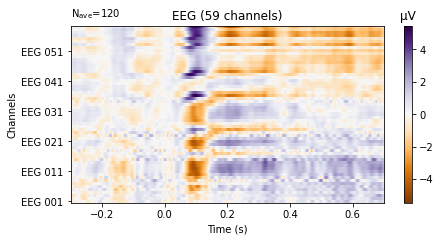

In [24]:
aud_ev.plot_image(picks='eeg',
                  show_names=True,  # would be much more informative if sample_data followed classic nomenclature
                  cmap='PuOr');

## 3. Define regions of interest (ROI)

#### We can further compare the average activity of channels for differnent conditions via the <a href="https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html" title="https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html">compare_evokeds()</a> function.

If a channel or a subset of channels is provided via the **"picks" parameter** the average activity in the specified channels for the specified evoked objects will be plotted. If no channels were specified the global field power (gfp) will be displayed (which is the the spatial variability of the signal across all channels, calculated by taking the standard deviation of each channel value for each time point. I.e a measure of elecromagnetic non-uniformity). The **conditions to compare are specified as a dictionary with a label assigned to the evoked object of the form "dict(audio=aud_ev,visual=vis_ev)"**. Using this we can specifiy which regions or subsets of channels we wish to visualize.

combining channels using "gfp"
combining channels using "gfp"


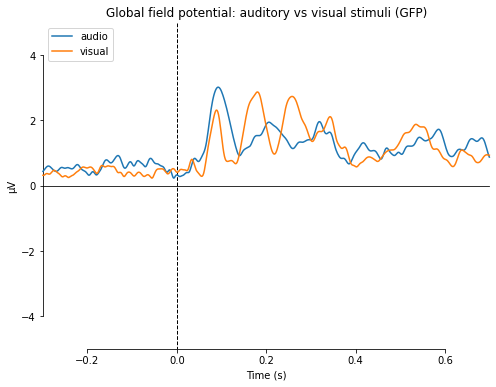

[<Figure size 576x432 with 1 Axes>]

In [25]:
mne.viz.plot_compare_evokeds(dict(audio=aud_ev,
                                  visual=vis_ev),
                                     title='Global field potential: auditory vs visual stimuli',
                                     ylim=dict(eeg=[-5, 5]))

<br/>
Let's compare some different ERPs across different modalities and channel locations to illustrate the function.

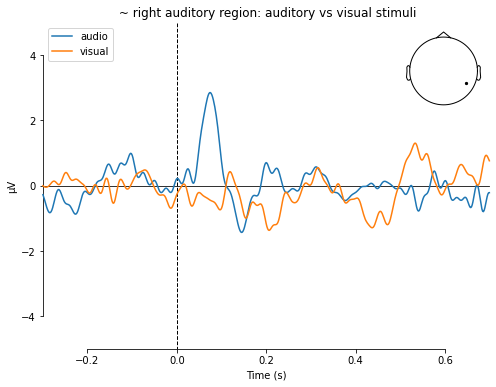

[<Figure size 576x432 with 2 Axes>]

In [26]:
mne.viz.plot_compare_evokeds(dict(audio=aud_ev,
                                  visual=vis_ev),
                            picks='EEG 042',
                            title=' ~ right auditory region: auditory vs visual stimuli',
                            ylim=dict(eeg=[-5, 5]))

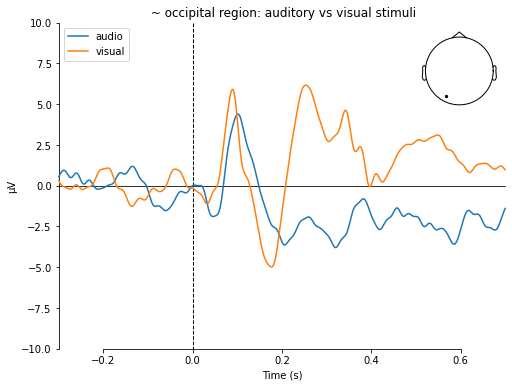

[<Figure size 576x432 with 2 Axes>]

In [27]:
mne.viz.plot_compare_evokeds(dict(audio=aud_ev,
                                  visual=vis_ev),
                             picks='EEG 054',
                             title=' ~ occipital region: auditory vs visual stimuli',
                             ylim=dict(eeg=[-10, 10]))

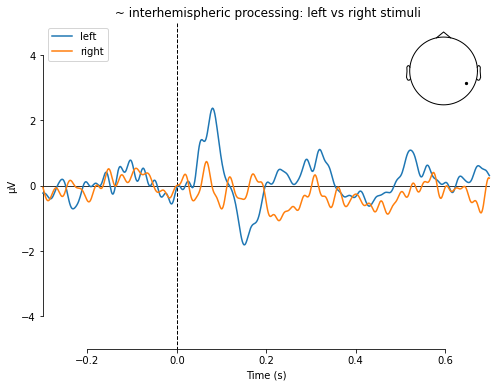

[<Figure size 576x432 with 2 Axes>]

In [28]:
mne.viz.plot_compare_evokeds(dict(left=left_ev,
                                  right=right_ev),
                            picks='EEG 042',
                            title=' ~ interhemispheric processing: left vs right stimuli',
                            ylim=dict(eeg=[-5, 5]))


<br/>
To define larger regions of interest we can simply assign groups of spatially clustered channels to python list objects and use the <a href="https://mne.tools/stable/generated/mne.pick_channels.html" title="https://mne.tools/stable/generated/mne.pick_channels.html">pick_channels()</a>
 function to find the corresponding indexes of channels.

In [29]:
# define roi as list of ch_names
picks_aud = ['EEG 025', 'EEG 026', 'EEG 023', 'EEG 024', 'EEG 034', 'EEG 035']

picks_vis = ['EEG 044', 'EEG 045','EEG 046', 'EEG 047', 'EEG 048', 'EEG 049',
           'EEG 054', 'EEG 055', 'EEG 057', 'EEG 058', 'EEG 059']

# get index for picks
aud_ix = mne.pick_channels(aud_ev.info['ch_names'], include=picks_aud)
vis_ix = mne.pick_channels(vis_ev.info['ch_names'], include=picks_vis)

In [30]:
# e.g. by side
left = ['EEG 018', 'EEG 025', 'EEG 037']
right = ['EEG 023', 'EEG 034', 'EEG 042']
left_ix = mne.pick_channels(l_aud_ev.info['ch_names'], include=left)
right_ix = mne.pick_channels(l_aud_ev.info['ch_names'], include=right)

<br/>
Passing the ROI list (e.g. picks_aud) as the picks argument and comparing the activity over all evoked objects (i.e. visual/right, visual/left and so on) returns the signal averaged over all specified channels in our ROi and all epochs corresponding to the different conditions we defined earlier. This might be informative but looks somewhat messy.

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


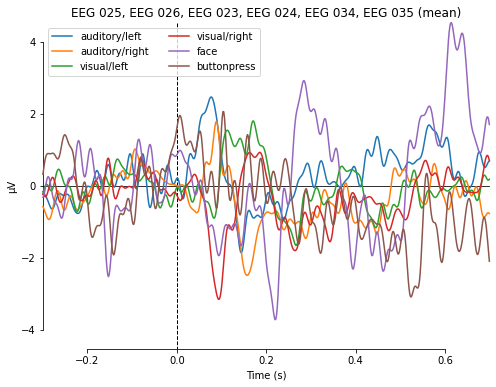

[<Figure size 576x432 with 1 Axes>]

In [31]:
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks=picks_aud)

<br/>

We'll restrict the conditions we want to compare to events that should sensibly produce activity in the specifid ROIs. For that we create a new dictionary of evoked objects by assigning labels to the previously specified variables.

In [32]:
#  dict for fancier plotting; auditory evokeds by side
evokeds_auditory = dict(left_auditory=l_aud_ev, right_auditory=r_aud_ev)

<br/> 

and **use the plot_compare_evokeds() function to compare e.g. auditory stimuli based on their location of presentation for channels on the right hemisphere**.

combining channels using "mean"
combining channels using "mean"


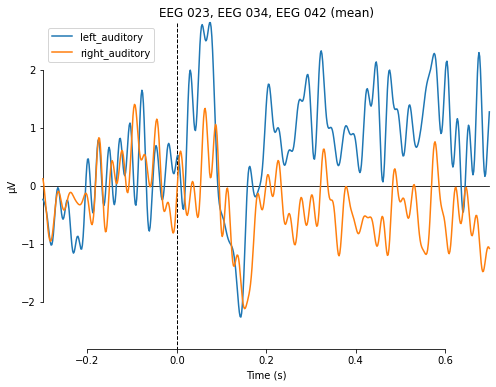

[<Figure size 576x432 with 1 Axes>]

In [33]:
mne.viz.plot_compare_evokeds(evokeds_auditory, picks=right_ix, combine='mean')

<br/>

or compare auditory and visual stimuli based for channels roughly associated with auditroy processing

combining channels using "mean"
combining channels using "mean"


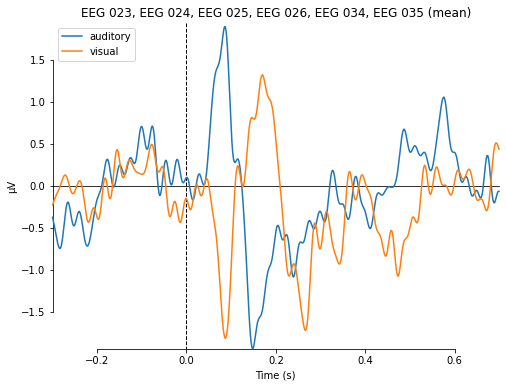

In [34]:
# fancier plotting; auditory rois
evokeds_vis_aud = dict(auditory=aud_ev, visual=vis_ev)
mne.viz.plot_compare_evokeds(evokeds_vis_aud, picks=aud_ix, combine='mean');

<br/>

To **compare the spread of evoked activity between auditory and visual conditions we can further overlay the butterfly plot on a topographical map**  by setting the parameter **"axes=topo"**. Thereby showing the average activity of each channel dependent on the the presentation of visual or auditory stimuli.
Again, consulte the <a href="https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html#mne.viz.plot_compare_evokeds" title="https://mne.tools/stable/generated/mne.viz.plot_compare_evokeds.html#mne.viz.plot_compare_evokeds">MNE API: compare_evoked()</a> for more possibilities of styling this plot (also, looks much better in the interactive version).

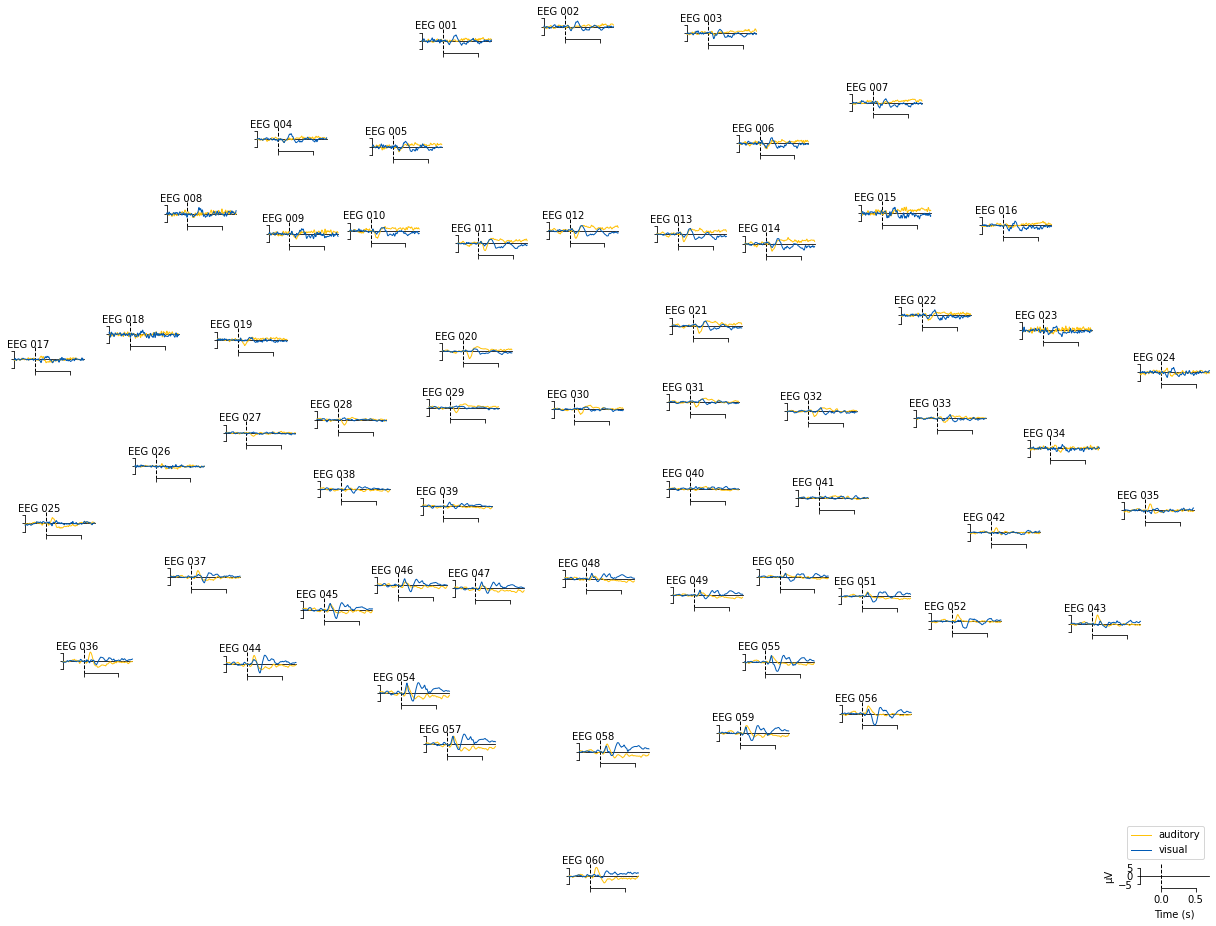

In [35]:
mne.viz.plot_compare_evokeds(evokeds_vis_aud, 
                             picks='eeg',
                             colors=dict(auditory='#FFC20A', visual='#005AB5'),  # just for style
                             axes='topo',
                             styles=dict(auditory=dict(linewidth=1),  # just for style
                                                      visual=dict(linewidth=1)));

### Virtual ROI channel
If we want to want to **build a single "ROI-channel" for an evoked object** we can use the <a href="https://mne.tools/stable/generated/mne.channels.combine_channels.html#mne.channels.combine_channels" title="https://mne.tools/stable/generated/mne.channels.combine_channels.html#mne.channels.combine_channels">mne.channels.combine_channels()</a> function, which combines a number of channels into one virtual channel. If we further specify a number of evoked objects to pass to the function a separate virtual channel will be build for each evoked object.

In [36]:
roi_sides_dict = dict(left_roi=left_ix, right_roi=right_ix)  # pass indexes of left/right roi channels to dict
aud_roi_evoked = mne.channels.combine_channels(aud_ev,  # audtiroy evokeds
                                               roi_sides_dict,
                                               method='mean')
aud_roi_evoked

<Evoked | '' (average, N=1), -0.29969 – 0.69928 sec, baseline off, 2 ch, ~17 kB>

In [37]:
aud_roi_evoked.get_data()

array([[-3.91922531e-07, -3.69310098e-07, -3.31903742e-07, ...,
         6.98709887e-09,  1.51504471e-08,  3.27459284e-08],
       [-5.16721656e-08, -1.11770458e-07, -1.88717915e-07, ...,
        -1.31025712e-07, -1.41099123e-08,  5.65105007e-08]])

<br/>

Unfortunately the non-interactive version of the .plot() function fails us here, as there is seemingly no parameter to specify the color or name of the virtual channels. **If you want to prepare your data in this way you'd therefore either have to use the interactive plot and change the color of the channels by hand or use matplotlib to create a new graph from scratch using the array returned by aud_roi_evoked.get_data()**.

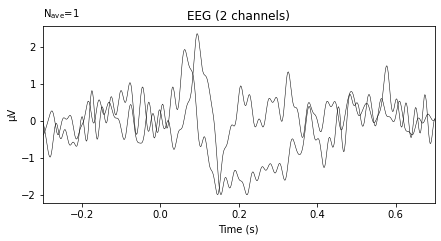

In [38]:
aud_roi_evoked.plot();

<br/>

Another way to compare conditions is to use the <a href="https://mne.tools/stable/generated/mne.combine_evoked.html#mne.combine_evoked" title="MNE API: mne.combine_evoked.()">mne.combine_evoked()</a> function. This allows the **merging of evoked data from different conditions by weighted addition or subtraction**. Setting the weights argument to [1, -1] will result in substraction of the second from the first provided evoked object.


No projector specified for this dataset. Please consider the method self.add_proj.


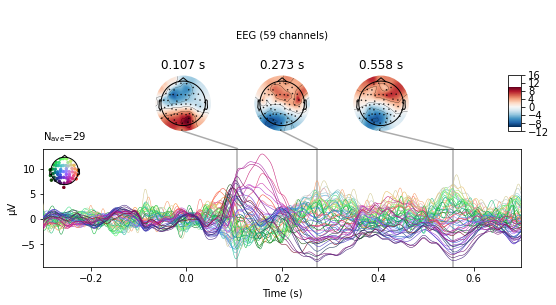

In [39]:
# substract auditory from visual activity for stimuli presented on the left side
l_aud_minus_vis = mne.combine_evoked([l_aud_ev, l_vis_ev], weights=[1, -1])
l_aud_minus_vis.plot_joint(); 

No projector specified for this dataset. Please consider the method self.add_proj.


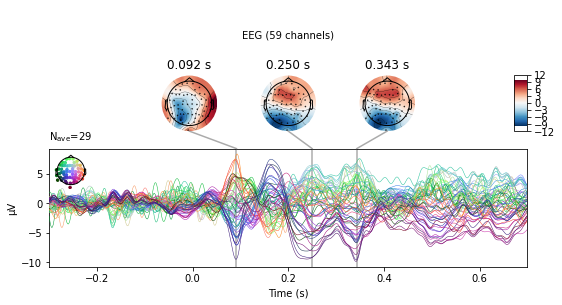

In [40]:
# substract auditory from visual activity for stimuli presented on the right side
r_aud_minus_vis = mne.combine_evoked([r_aud_ev, r_vis_ev], weights=[1, -1])
r_aud_minus_vis.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


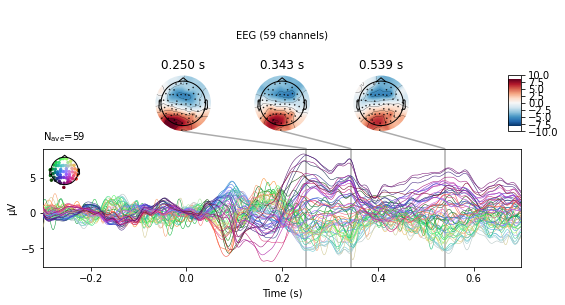

In [41]:
#subtract auditory from visual activity
vis_minus_aud = mne.combine_evoked([vis_ev, aud_ev], weights=[1, -1])
vis_minus_aud.plot_joint();

No projector specified for this dataset. Please consider the method self.add_proj.


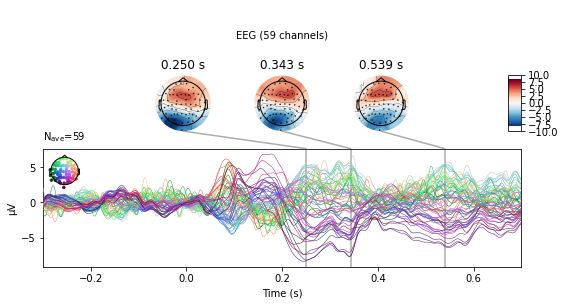

In [42]:
#subtract visual from auditory activity
vis_minus_aud = mne.combine_evoked([vis_ev, aud_ev], weights=[-1, 1])
vis_minus_aud.plot_joint();

<br/>

For more input on how to visualize evoked data head to the <a href="https://mne.tools/stable/auto_tutorials/evoked/20_visualize_evoked.html" title="https://mne.tools/stable/auto_tutorials/evoked/20_visualize_evoked.html">MNE tutorial: Visualizing Evoked data</a>. You can also check out the blog-post <a href="https://davidmathlogic.com/colorblind/#%23005AB5-%23DC3220" title="https://davidmathlogic.com/colorblind/#%23005AB5-%23DC3220">Coloring for Colorblindness</a> on how non-inclusive choices may affect your plots and which contrasting color pairs may be more fitting.

If you're interested in how to plot statistical significance threshholds over your ERP plot you can follow this <a href="https://mne.tools/stable/auto_tutorials/stats-sensor-space/20_erp_stats.html" title="https://mne.tools/stable/auto_tutorials/stats-sensor-space/20_erp_stats.html">MNE tutorial: Visualising statistical significance thresholds on EEG data</a>





### Grand averages
For group level analysis we could further compute so called grand averages, i.e. averaging the signal of all subjects for a certain condition. As this would make no sense for the present single subject data, see "Grand averages" in the <a href="https://mne.tools/stable/auto_tutorials/evoked/30_eeg_erp.html" title="MNE tutorial: EEG processing and Event Related Potentials">MNE tutorial: EEG processing and Event Related Potentials</a> for more info.



### Save/Export data

Let's first get our paths in order.

In [43]:
homedir = os.path.expanduser("~")  # find home diretory
bids_folder_path = (str(os.sep) + 'msc_05_example_bids_dataset' + 
               str(os.sep) + 'sub-test' + str(os.sep) + 'ses-001' + str(os.sep) + 'meg')
                         


output_path = homedir + bids_folder_path
print(output_path)

/home/michael/msc_05_example_bids_dataset/sub-test/ses-001/meg


<br/>

And to save or export evoked data we proceed in the same manner as in the previous chapters. We can either write the evoked data to a pandas DataFrame and export the DataFrame as a .tsv file

In [44]:
df=aud_ev.to_data_frame()
df

,time,EEG 001,EEG 002,EEG 003,EEG 004,EEG 005,EEG 006,EEG 007,EEG 008,EEG 009,...,EEG 050,EEG 051,EEG 052,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060
0,-300,-0.273486,-0.705960,-0.716901,0.000873,0.376220,0.046862,-0.481563,-0.065211,0.111456,...,-0.123930,-0.311101,-0.491009,0.542431,-0.473025,-0.709696,0.420646,0.116793,-0.457120,-0.270652
1,-298,-0.358799,-0.656849,-0.759258,0.011594,0.443271,-0.063794,-0.598507,0.056031,-0.014147,...,-0.117610,-0.325659,-0.524114,0.628147,-0.435255,-0.704167,0.514167,0.207106,-0.386811,-0.181919
2,-296,-0.421568,-0.570382,-0.803121,0.007416,0.462682,-0.192772,-0.722229,0.148973,-0.150639,...,-0.110002,-0.336857,-0.550440,0.711637,-0.396294,-0.689133,0.608688,0.297349,-0.314539,-0.085795
3,-295,-0.457549,-0.456782,-0.842626,-0.008271,0.439441,-0.325556,-0.838798,0.207098,-0.276764,...,-0.102828,-0.344320,-0.570619,0.789199,-0.358065,-0.666718,0.699356,0.382951,-0.243442,0.010825
4,-293,-0.465113,-0.329720,-0.868505,-0.030309,0.383933,-0.447467,-0.934531,0.229226,-0.372866,...,-0.098432,-0.348692,-0.586340,0.856297,-0.323208,-0.640448,0.780274,0.458829,-0.177358,0.100279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,693,1.021945,1.389569,1.603583,0.354900,1.535488,1.175721,1.204013,-0.398187,0.979819,...,-1.035178,-1.492689,-0.526998,-1.865670,-1.116604,-0.717162,-1.807308,-1.885107,-1.537620,-0.355314
597,694,0.948624,1.294110,1.432409,0.377047,1.463960,1.060179,1.094829,-0.255787,0.829088,...,-0.976875,-1.429080,-0.444614,-1.737224,-0.995170,-0.623922,-1.697016,-1.763489,-1.403196,-0.248636
598,696,0.881483,1.197141,1.295577,0.422118,1.404105,0.971797,1.017964,-0.066488,0.696837,...,-0.929177,-1.378435,-0.375621,-1.615313,-0.881996,-0.535283,-1.592202,-1.651932,-1.272434,-0.162004
599,698,0.828058,1.104750,1.198133,0.483204,1.355620,0.912522,0.978644,0.142922,0.601567,...,-0.895735,-1.343722,-0.325779,-1.502037,-0.783363,-0.456373,-1.495208,-1.554227,-1.150319,-0.096405


In [45]:
df.to_csv(output_path + str(os.sep) + 'sub-test_ses-001_sample_audiovis_eeg_auditory_ave.tsv', 
          sep='\t')

or use the evoked.save() function.

In [46]:
aud_ev.save(output_path + str(os.sep) + 'sub-test_ses-001_sample_audiovis_eeg_auditory_ave.fif',
            overwrite=True)

<br/>
To save our previously created figures we can use the <a href="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.savefig.html" title="https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.savefig.html"> matplotlib.plt.savefig()</a> function. First we'll create a folder called "derivatives" to store our graphs in.

In [47]:
homedir = os.path.expanduser("~")  # find home diretory
derivatives_folder_path = (homedir + str(os.sep) + 'msc_05_example_bids_dataset' +  # assemble derivatives path
               str(os.sep) + 'sub-test' + str(os.sep) + 'derivatives')

print(derivatives_folder_path)
os.mkdir(derivatives_folder_path)  # make directory

/home/michael/msc_05_example_bids_dataset/sub-test/derivatives


<br/>

and use fig.savefig() to save the graph

No projector specified for this dataset. Please consider the method self.add_proj.


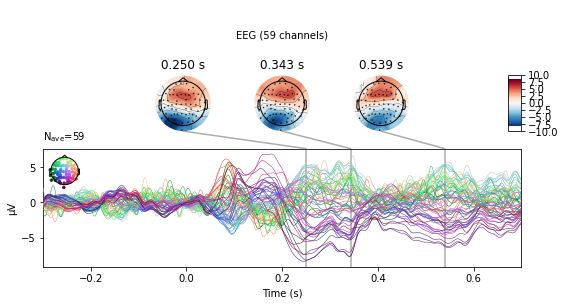

In [49]:
fig = vis_minus_aud.plot_joint();
fig.savefig(derivatives_folder_path + str(os.sep) + 'vis_minus_aud_evoked_plot.png')

## If you're interested in more complex ways to analyse EEG data you can check-out the following:

<a href="https://mne.tools/stable/auto_examples/time_frequency/index.html" title="https://mne.tools/stable/auto_examples/time_frequency/index.html">MNE tutorial overview: Time-Frequency analysis</a>

<a href="https://mne.tools/stable/auto_examples/decoding/index.html" title="https://mne.tools/stable/auto_examples/decoding/index.html">MNE tutorial overview: Machine Learning (Decoding, Encoding, and MVPA)</a>

<a href="https://mne.tools/mne-connectivity/stable/auto_examples/index.html#sphx-glr-auto-examples" title="https://mne.tools/mne-connectivity/stable/auto_examples/index.html#sphx-glr-auto-examples">MNE_connectivity tutorial overview:  Connectivity analysis in Sensor and Source space</a>